* Welcome to the hands-on lab for **Using GitHub Actions - Setting up the Workflow**. 
* In this part, you will build a workflow in a GitHub repository using GitHub Actions. 
* You will create an empty workflow file in Step 1 and add events and a job runner in the following steps. 
* You will subsequently finish the workflow in the next lab called **Using GitHub Actions - Building the CI pipeline**. 
* Ensure you finish this lab completely before starting part 2.

# Learning Objectives

After completing this lab, you will be able to:
* Create a GitHub workflow to run your CI pipeline
* Add events to trigger the workflow
* Add a job to the workflow
* Add a job runner to the job
* Add a container to the job runner

# Prerequisites

You will need the following to complete the exercises in this lab:
* A basic understanding of YAML
* A GitHub account
* An intermediate-level knowledge of CLIs

# Generate GitHub Personal Access Token

You will fork and clone a repo in this lab using the `gh` CLI tool. 

You will also push changes to your cloned repo at the end of this lab. 

This requires you to authenticate with GitHub using a `personal access token`. 

Follow the steps here to generate this token and save it for later use:

1. Navigate to [GitHub Settings](https://github.com/settings/tokens) of your account.


2. Click **Generate new token** to create a personal access token.

    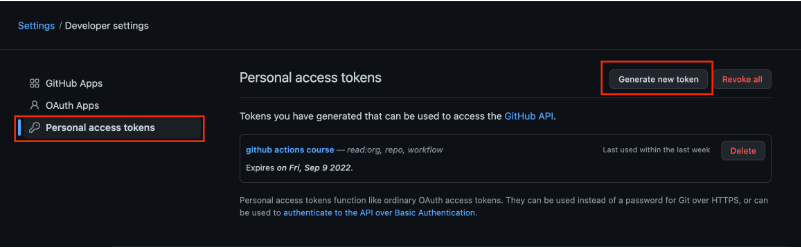

3. Give your token a descriptive name and optionally change the expiration date.

    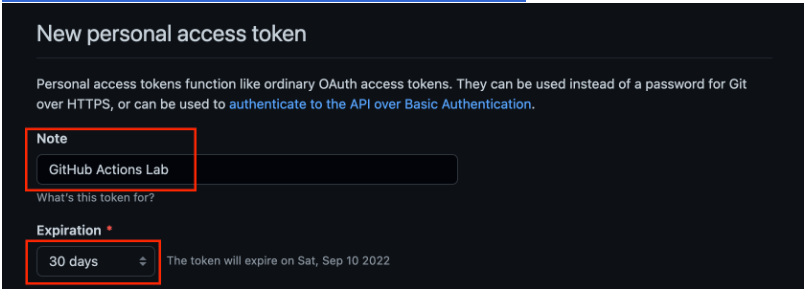

4. Select the minimum required scopes needed for this lab: `repo`, `read:org`, and `workflow`.

   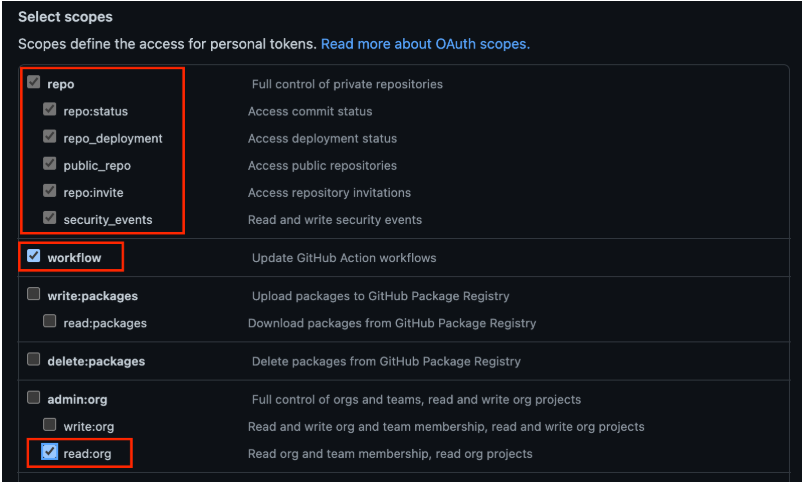

5. Click **Generate token**.

   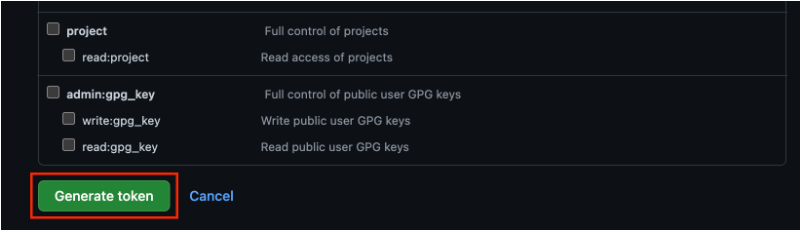

6. Make sure you copy the token and paste it somewhere safe as you will need it in the next step. **WARNING: You will not be able to see it again**.

    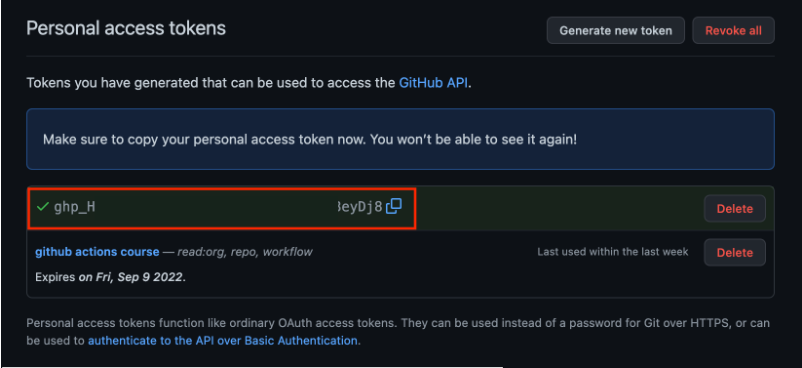

**`Warning: Keep your tokens safe and protect them like passwords.`**

If you lose this token at any time, repeat the above steps to regenerate the token.

# Fork and Clone the Repository

## Authenticate with GitHub

First, let's run the following commands to install GitHub CLI.

```
sudo apt update
sudo apt install gh
```

Then run the following command to authenticate with GitHub in the terminal. 

You will need the `GitHub Personal Token` you created in the previous step.

```
gh auth login
```

**You will be taken through a guided experience as shown here:**
> * What account do you want to log into? **GitHub.com**
> * What is your preferred protocol for Git operations? **HTTPS**
> * Authenticate Git with your GitHub credentials.
> * How would you like to authenticate GitHub CLI? **Paste an authentication token.**
> * Paste your authentication token: ****************************************
> * You will be logged into GitHub as your account user.

After you have authenticated successfully, you will need to fork and clone this GitHub repo in the terminal. 

`https://github.com/ibm-developer-skills-network/wtecc-CICD_PracticeCode`

You will then create a workflow to trigger GitHub Actions in your forked version of the repository.

## Fork and Clone the Reference Repo

```
gh repo fork ibm-developer-skills-network/wtecc-CICD_PracticeCode
```

**Note** Once you run the command, it will prompt you to clone the fork. Type Yes to proceed.

Your output should look similar to the image below:

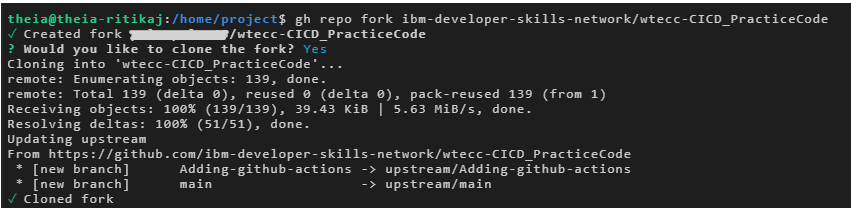

> **Important: Pull Request**
>
> *When making a pull request, make sure that your request is merging with your fork because the pull request of a fork will default to come back to this repo, not your fork.*

## Change to the Lab Folder

Once you have cloned the repository, change to the directory named `wtecc-CICD_PracticeCode`

```
cd wtecc-CICD_PracticeCode
```

List the contents of this directory to see the artifacts for this lab.

```
ls -l
```

The directory should look like the listing below:

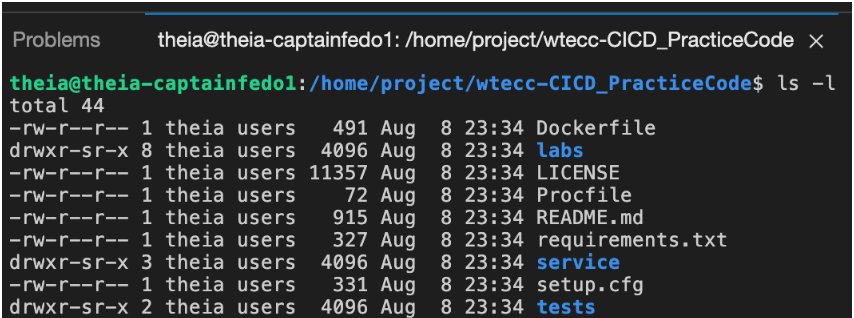

**You are now ready to start the lab.**

# Step 1: Create a Workflow

To get started, you need to create a workflow yaml file. 

The first line in this file will define the name of the workflow that shows up in GitHub Actions page of your repository.

## Your Task

1. Open the terminal and ensure you are in the `wtecc-CICD_PracticeCode` directory.
    ```
    cd /home/project/wtecc-CICD_PracticeCode
    ```
2. Create the directory structure `.github/workflows` and create a file called `workflow.yml`.

    ```
    mkdir -p .github/workflows
    touch .github/workflows/workflow.yml
    ```
3. Every workflow starts with a name. The name will be displayed on the Actions page and on any badges. Give your workflow the name `CI workflow` by adding a `name:` tag as the first line in the file.
   ```
   name: {insert name here}
   ```

**Double-check that your work matches the solution below.**

## Solution

Replace the `workflow.yml` file with the code snippet below.

You can also copy relevant parts of the code. Be sure to indent properly:

```
name: CI workflow
```

# Step 2: Add Event Triggers

Event triggers define which events can cause the workflow to run. 

You will use the `on:` tag to add the following events:
* Run the workflow on every push to the main branch
* Run the workflow whenever a pull request is created to the main branch.

## Your Task

1. Add the `on:` keyword to the workflow at the same level of indentation as the `name:`.
    ```
    on:
    ```
2. Add `push:` event as the first event that can trigger the workflow. This is added as the child element of `on:` so it must be indented under it.

    ```
    on:
      {insert first event name here}:
    ```
3. Add the `"main"` branch to the push event. You want the workflow to start every time somebody pushes to the main branch. This also includes merge events. You do this by using the `branches:` keyword followed by a list of branches either as `[]` or `-`.

    ```
    on:
      push:
        branches: [ {insert branch name here} ]
    ```
4. Add a `pull_request:` event similar to the push event you just finished. It should be triggered whenever the user makes a pull request on the main branch.

    ```
    on:
        push:
            branches: [ "main" ]
            {insert second event name here}:
            branches: [ {insert branch name here} ]
    ```

**Double-check that your work matches the solution below.**

## Solution

```
name: CI workflow

on:
  push:
    branches: [ "main" ]
  pull_request:
    branches: [ "main" ]
```

# Step 3: Add a Job

You will now add a job called `build` to the workflow file. This job will run on the `ubuntu-latest` runner. Remember, a job is a collection of steps that are run on the events you added in the previous step.

## Your Task

1. First you need a job. Add the `jobs:` section to the workflow at the same level of indentation as the `name` (i.e., no indent).
    ```
        jobs:
    ```
2. Next, you need to name the job. Name your job `build:` by adding a new line under the `jobs:` section.

    ```
        jobs:
            {insert job name here}:
    ```
3. Finally, you need a runner. Tell GitHub Actions to use the `ubuntu-latest` runner for this job. You can do this by using the `runs-on:` keyword.

    ```
        jobs:
          build:
            runs-on: {insert runner name here}
    ```

**Double-check that your work matches the solution below.**

## Solution

```
name: CI workflow

on:
  push:
    branches: [ "main" ]
  pull_request:
    branches: [ "main" ]

jobs:
  build:
    runs-on: ubuntu-latest
```

# Step 4: Target Python 3.9

It is important to consistently use the same version of dependencies and operating system for all phases of development including the CI pipeline. This project was developed on Python 3.9, so you need to ensure that the CI pipeline also runs on the same version of Python. You will accomplish this by running your workflow in a container inside the GitHub action.

## Your Task

Add a `container:` section under the `runs-on:` section of the build job, and tell GitHub Actions to use `python:3.9-slim` as the image.

## Hint

```
    jobs:
      build:
        runs-on: ubuntu-latest
        container: {insert container name here}
```

**Double-check that your work matches the solution below.**

## Solution

```
name: CI workflow

on:
  push:
    branches: [ "main" ]
  pull_request:
    branches: [ "main" ]

jobs:
  build:
    runs-on: ubuntu-latest
    container: python:3.9-slim
```

# Step 5: Save Your Work

It is now time to save your work back to your forked GitHub repository.

## Your Task

1. Configure the Git account with your email and name using the `git config --global user.email` and `git config --global user.name` commands.

    ```
        git config --global user.email "you@example.com"
        git config --global user.name "Your Name"
    ```

2. The next step is to stage all the changes you made in the previous exercises and push them to your forked repo on GitHub.

    ```
        git add -A
        git commit -m "COMMIT MESSAGE"
        git push
    ```

**Your output should look similar to the image below:**

## Solution

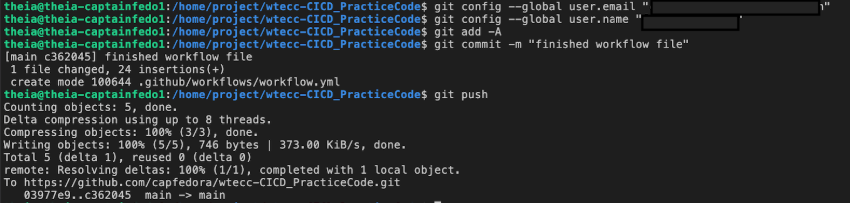

You are done with part 1 of the lab, however if you were to look at the `Actions` tab in your forked repository, you will notice the GitHub action was triggered and has failed. The action was triggered because you `pushed` code to the `main` branch of the repository. It failed as you have not finished the workflow yet. You will add the remaining steps in part 2 of the lab so the workflow runs successfully. You can ignore this error at this time.

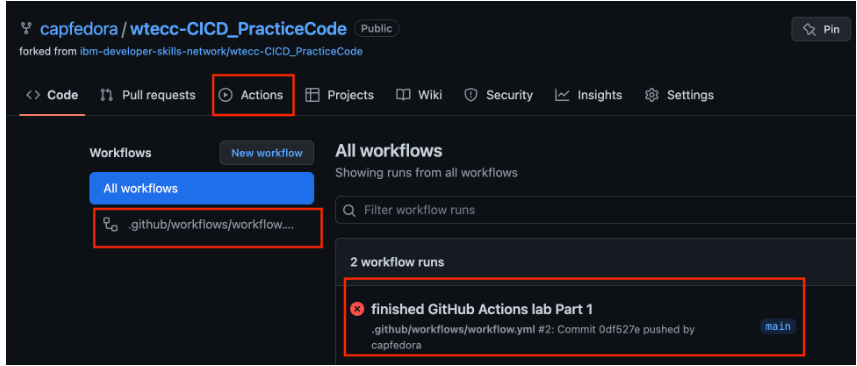

**Congratulations!** 
* In this lab, you started building your Continuous Integration pipeline. 
* This pipeline will run automatically when you commit your code to the GitHub repository based on the events described in the workflow.
* You successfully created a GitHub Actions workflow and added an empty job. 
* You can now proceed to extend the CI pipeline by adding steps to build dependencies, test your code, and report test coverage.